# Cross Validation

In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [4]:
df = pd.read_csv('./used_cars.csv.gz').set_index('Id')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
Id,,,,,,,,
1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [5]:
train, test = train_test_split(df)

In [6]:
X, y = train[['Year', 'Mileage']], train.Price

In [7]:
X.shape

(223424, 2)

In [8]:
y.shape

(223424,)

## Basic Cross-Validation

- gives us the score for every split

In [13]:
lr = LinearRegression()
cross_val_score(lr, X, y, cv=10).mean()

0.2203024136783141

In [15]:
tree = DecisionTreeRegressor(max_depth=4)
cross_val_score(tree, X, y, cv=10).mean()

0.2620269843632161

In [16]:
tree = DecisionTreeRegressor(max_depth=2)
cross_val_score(tree, X, y, cv=10).mean()

0.22891235448619315

In [19]:
# to use mean squared error instead...
from sklearn.metrics import mean_squared_error, make_scorer

cross_val_score(lr, X, y, cv=4, scoring=make_scorer(mean_squared_error))

array([1.53063646e+08, 1.49689417e+08, 1.54283953e+08, 1.51780612e+08])

## Grid Search

- an algorithm
- a "grid" of params to search through

In [36]:
tree = DecisionTreeRegressor()
params = {
    'max_depth': range(1, 21),
    'splitter': ['best', 'random']
}

In [37]:
# grid = GridSearchCV(tree, params, cv=4)
grid = GridSearchCV(tree, params, cv=4, scoring=make_scorer(mean_squared_error))
grid.fit(X, y)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 21), 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error), verbose=0)

In [38]:
results = grid.cv_results_
results['mean_test_score']

array([1.64837675e+08, 1.81567357e+08, 1.50491903e+08, 1.75109517e+08,
       1.46117972e+08, 1.57055206e+08, 1.44153228e+08, 1.57213782e+08,
       1.42913006e+08, 1.54431198e+08, 1.42588998e+08, 1.50923986e+08,
       1.42384356e+08, 1.49154644e+08, 1.43666194e+08, 1.47715020e+08,
       1.46824068e+08, 1.47262477e+08, 1.50584094e+08, 1.45972815e+08,
       1.53695156e+08, 1.45375073e+08, 1.58400366e+08, 1.46753562e+08,
       1.63573122e+08, 1.48220577e+08, 1.70188891e+08, 1.49481637e+08,
       1.75763712e+08, 1.50375877e+08, 1.81241626e+08, 1.50952008e+08,
       1.87618275e+08, 1.61312644e+08, 1.91693193e+08, 1.62917267e+08,
       1.97734637e+08, 1.70934161e+08, 2.01456157e+08, 1.75534714e+08])

In [40]:
results = grid.cv_results_
for params, score in zip(results['params'], results['mean_test_score']):
    params['score'] = score
    
df = pd.DataFrame(results['params'])
df

,max_depth,splitter,score
0,1,best,1.648377e+08
1,1,random,1.815674e+08
2,2,best,1.504919e+08
3,2,random,1.751095e+08
4,3,best,1.461180e+08
5,3,random,1.570552e+08
6,4,best,1.441532e+08
7,4,random,1.572138e+08
8,5,best,1.429130e+08
9,5,random,1.544312e+08


In [27]:
df.sort_values(by='score')

,max_depth,splitter,score
38,20,best,-0.035289
36,19,best,-0.009265
34,18,best,0.014699
32,17,best,0.041357
1,1,random,0.043108
39,20,random,0.062678
30,16,best,0.073016
28,15,best,0.096299
37,19,random,0.101593
26,14,best,0.128441


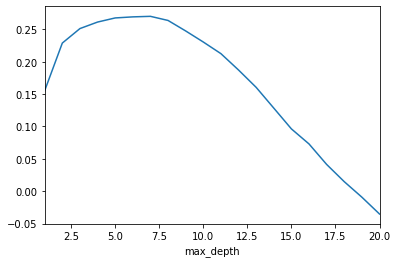

In [31]:
%matplotlib inline
df[df.splitter == 'best'].set_index('max_depth').score.plot()

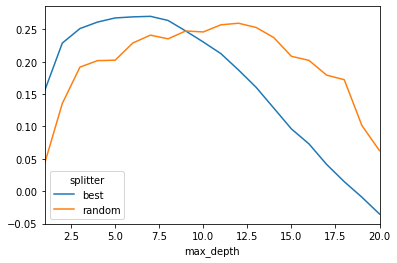

In [34]:
df.pivot_table('score', 'max_depth', 'splitter').plot()